In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Country Population Growth Predictions.csv", sep = ",")
df.head(10)

,Country,Area_km,Population,Pop_Density,Yearly_Change,One_Year_Prediction,Density_One_Year,Ten_Year_Prediction,Density_Ten_Year,One_Hundred_Year_Prediction,Density_One_Hundred_Year
0,Macao,30,649335,21645,1.39,658361,21945,739593,24653,1551911,51730
1,Singapore,700,5850342,8358,0.79,5896560,8424,6312519,9018,10472112,14960
2,Hong Kong,1050,7496981,7140,0.82,7558456,7199,8111733,7725,13644505,12995
3,Bahrain,760,1701575,2239,3.68,1764193,2321,2327755,3063,7963371,10478
4,Maldives,300,540544,1802,1.81,550328,1834,638382,2128,1518929,5063
5,Palestine,6020,5101414,847,2.41,5224358,868,6330855,1052,17395822,2890
6,Mayotte,375,272815,728,2.50,279635,746,341019,909,954853,2546
7,Bangladesh,130170,164689383,1265,1.01,166352746,1278,181323011,1393,331025660,2543
8,Burundi,25680,11890784,463,3.12,12261776,477,15600709,608,48990030,1908
9,Rwanda,24670,12952218,525,2.58,13286385,539,16293890,660,46368940,1880


In [4]:
df.shape

(201, 11)

In [5]:
total = df.isnull().sum().sort_values(ascending=False)
total

Country                        0
Area_km                        0
Population                     0
Pop_Density                    0
Yearly_Change                  0
One_Year_Prediction            0
Density_One_Year               0
Ten_Year_Prediction            0
Density_Ten_Year               0
One_Hundred_Year_Prediction    0
Density_One_Hundred_Year       0
dtype: int64

In [6]:
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Country,Macao,Singapore,Hong Kong,Bahrain,Maldives,Palestine,Mayotte,Bangladesh,Burundi,Rwanda
Area_km,30,700,1050,760,300,6020,375,130170,25680,24670
Population,649335,5850342,7496981,1701575,540544,5101414,272815,164689383,11890784,12952218
Pop_Density,21645,8358,7140,2239,1802,847,728,1265,463,525
Yearly_Change,1.39,0.79,0.82,3.68,1.81,2.41,2.5,1.01,3.12,2.58
One_Year_Prediction,658361,5896560,7558456,1764193,550328,5224358,279635,166352746,12261776,13286385
Density_One_Year,21945,8424,7199,2321,1834,868,746,1278,477,539
Ten_Year_Prediction,739593,6312519,8111733,2327755,638382,6330855,341019,181323011,15600709,16293890
Density_Ten_Year,24653,9018,7725,3063,2128,1052,909,1393,608,660
One_Hundred_Year_Prediction,1551911,10472112,13644505,7963371,1518929,17395822,954853,331025660,48990030,46368940


# Hitung Total Prediksi Kepadatan 1, 10, 100 tahun Negara di Asia Tenggara

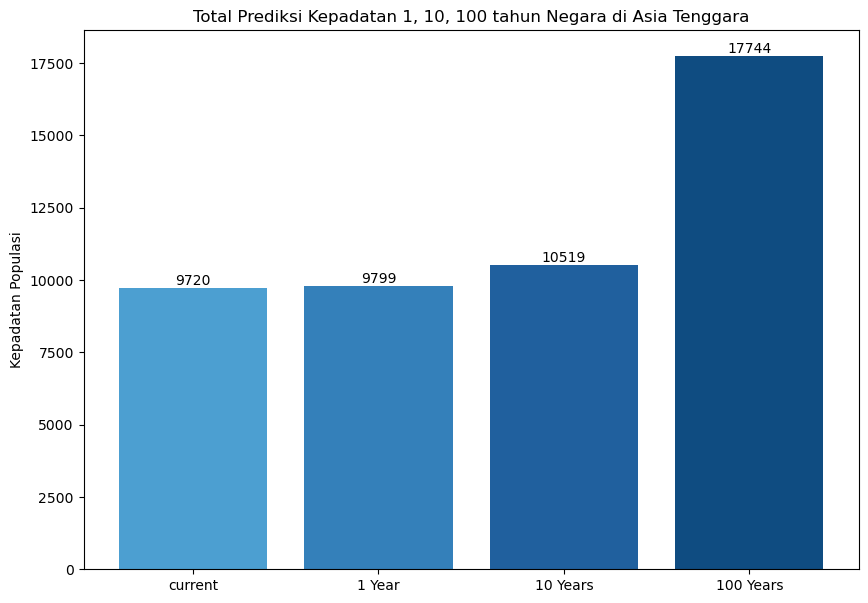

In [37]:
# Daftar negara Asia Tenggara
southeast_Asia = ['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']


current_densities = (df.loc[df.Country.isin(southeast_Asia), 'Pop_Density'].sum())
density_1_year = (df.loc[df.Country.isin(southeast_Asia), 'Density_One_Year'].sum())
density_10_year = (df.loc[df.Country.isin(southeast_Asia), 'Density_Ten_Year'].sum())
density_100_year = (df.loc[df.Country.isin(southeast_Asia), 'Density_One_Hundred_Year'].sum())

# Definisi variabel
densities = [current_densities, density_1_year, density_10_year, density_100_year]

labels = ['current', '1 Year', '10 Years', '100 Years']
colors = ["#4c9fd1", "#3480ba", "#20609e", "#0f4c81"]

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(labels, densities, color=colors)  # Menyimpan objek bar dalam variabel `bars`
ax.set_title('Total Prediksi Kepadatan 1, 10, 100 tahun Negara di Asia Tenggara')
ax.set_ylabel('Kepadatan Populasi')

# Menambahkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.show()

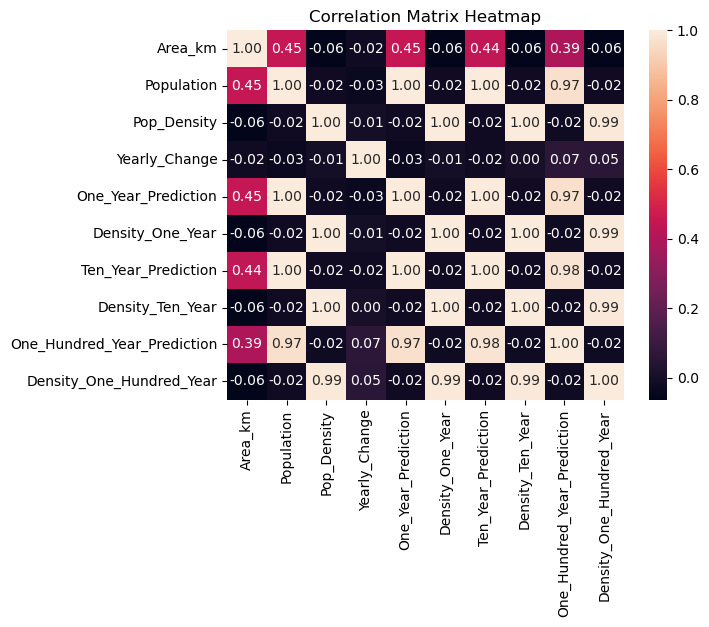

In [10]:
correlation_matrix = df.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns)
plt.title('Correlation Matrix Heatmap')
plt.show()